Q1. Top-10 Reviewer

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Reviews.csv")
pd_data = dataset[:10000]

In [3]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
scoremean=pd_data.groupby(['UserId','ProfileName'],as_index=False)['Score'].agg({'Score count':'count','Score mean':'mean'})
scoremean.sort_values('Score count',ascending=False).head(10)

#Q1_answer

,UserId,ProfileName,Score mean,Score count
2330,A1Z54EM24Y40LL,c2,3.882353,17
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",3.800000,10
5169,A35R32TA60XD57,M. Torma,4.111111,9
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",5.000000,8
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",4.428571,7
6330,A3NHUQ33CFH3VM,Citizen John,3.142857,7
6493,A3PJZ8TU8FDQ1K,Jared Castle,4.714286,7
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",2.666667,6
2826,A26NFIQ7KWI8Y7,kt rose,2.666667,6
31,A10H24TDLK2VDP,William Jens Jensen,3.000000,6


Q2. Plot score distribution for the user with the most number of reviews

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
TOP1="A1Z54EM24Y40LL"
user1 = pd_data[pd_data['UserId'] == TOP1 ]

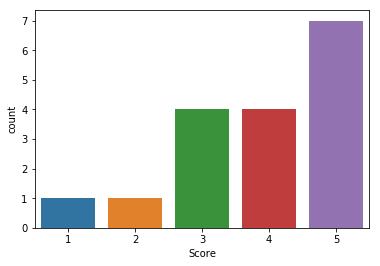

In [7]:
sns.countplot(x= 'Score' , data = user1)

#Q2_answer

Q3. Plot pandas Series DataFrame (Time->Date)

In [8]:
import datetime
year=pd.to_datetime(pd_data['Time'], unit='s').dt.year
year.head()

0    2011
1    2012
2    2008
3    2011
4    2012
Name: Time, dtype: int64

In [9]:
year_data=pd_data.drop(columns=['ProductId','UserId','ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Score', 'Summary','Text','Time'])
year_data['Year']=year
year_data=year_data.groupby('Year')['Year'].count().reset_index(name='yearcount')
year_data


,Year,yearcount
0,2000,2
1,2004,20
2,2005,28
3,2006,122
4,2007,370
5,2008,508
6,2009,1193
7,2010,1621
8,2011,2890
9,2012,3246


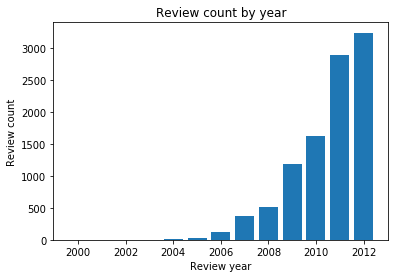

In [10]:
x=year_data.loc[:,'Year']
y=year_data.loc[:,'yearcount']
plt.bar(x,y)

plt.title("Review count by year")
plt.xlabel("Review year")
plt.ylabel("Review count")
plt.show()

#Q3_answer

Q4. Plot HeatMap using seaborn

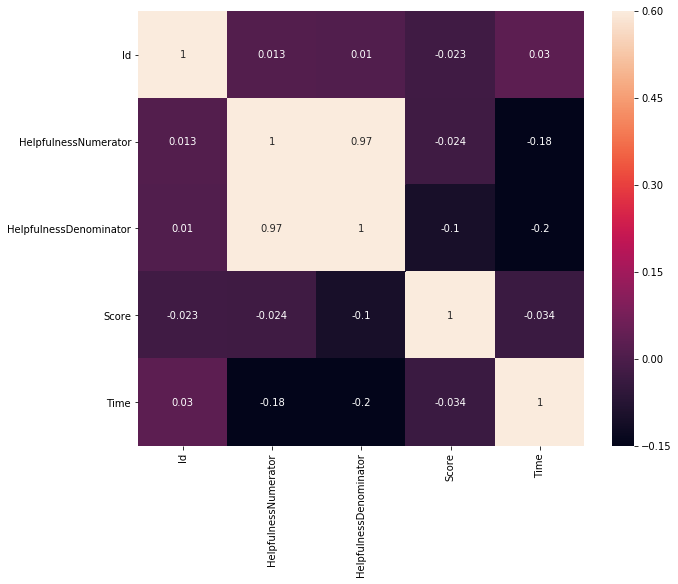

In [11]:
plt.figure(figsize=(10, 8))
q4_data= pd_data[["Id", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time"]]
sns.heatmap(q4_data.corr(), annot = True, vmin=-0.15 , vmax= 0.60 )

#Q4_answer

Q5. Helpful percent

In [12]:
pd_data['Helpfulpercent']=pd_data['HelpfulnessNumerator']/pd_data['HelpfulnessDenominator']
Hp_data = pd_data['Helpfulpercent']
Hp_data.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    1.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: Helpfulpercent, dtype: float64

In [13]:
NaN=-1
pd_data['Helpfulpercent'].fillna(NaN, inplace = True)
Hp_data.head()

/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0    1.0
1   -1.0
2    1.0
3    1.0
4   -1.0
Name: Helpfulpercent, dtype: float64

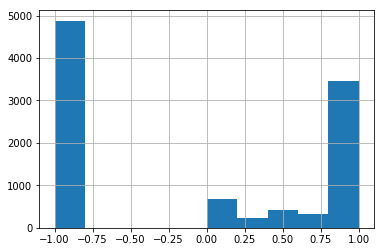

In [14]:
plt.hist(Hp_data)
plt.grid()
plt.show()

#Q5_answer